#### End-to-End Insurance Risk Analytics & Predictive Modeling
* Load Data
* Understand the data
* Do EDA
* Establish a reproducible and auditable data pipeline using Data Version Control (DVC)
* A/B Hypothesis Testing Design and Implimentation
* Build and evaluate predictive models that form the core of a dynamic, risk-based pricing system.

##### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..') # Adjust the path to use custom modules if necessary

##### Load the Data

In [2]:
##### Load the Data 
from src.data_loader import load_insurance_data
df=load_insurance_data('../data/insurance.txt')
df.head(3)

d:\FInalProject\End-to-End-Insurance-Risk-Analytics\notebooks\..\src\data_loader.py:55: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep="|", header=0)
d:\FInalProject\End-to-End-Insurance-Risk-Analytics\notebooks\..\src\data_loader.py:81: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors="coerce")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


#### Data Understanding
* check data type of each column
* check missing Values

In [3]:
df.dtypes # check data types of each column


UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                               object
Cylinders  

In [4]:
df.isnull().sum() # check for missing values

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                          0
NumberOfDoors               

#### PreProcess our Dataset
* drop columns with >50% missing values
* fill modarate missing value
* convert catagorical columns to catagory dtaypes

In [5]:
# preprocessing dataset to clean snd prepare for analysis
from src.preprocess import preprocess_insurance_data #import custom preprocessing function
df_clean=preprocess_insurance_data(df) #clean the data using custom function
df_clean.head(3)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,LossRatio
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,0.0


In [6]:
# check the dataset after preprocessing 
df_clean.dtypes # check data types of each column

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                       category
LegalType                         category
Title                             category
Language                          category
Bank                              category
AccountType                       category
MaritalStatus                     category
Gender                            category
Country                           category
Province                          category
PostalCode                           int64
MainCrestaZone                    category
SubCrestaZone                     category
ItemType                          category
mmcode                             float64
VehicleType                       category
RegistrationYear                     int64
make                              category
Model                             category
Cylinders  

In [7]:
# check missing value after preprocessing
df_clean.isnull().sum() # check for missing values

UnderwrittenCoverID           0
PolicyID                      0
TransactionMonth              0
IsVATRegistered               0
Citizenship                   0
LegalType                     0
Title                         0
Language                      0
Bank                          0
AccountType                   0
MaritalStatus                 0
Gender                        0
Country                       0
Province                      0
PostalCode                    0
MainCrestaZone                0
SubCrestaZone                 0
ItemType                      0
mmcode                        0
VehicleType                   0
RegistrationYear              0
make                          0
Model                         0
Cylinders                     0
cubiccapacity                 0
kilowatts                     0
bodytype                      0
NumberOfDoors                 0
VehicleIntroDate            552
AlarmImmobiliser              0
TrackingDevice                0
NewVehic

In [9]:
# save the cleaned data to a new file
df_clean.to_csv('../data/insurance_cleaned.csv', index=False)


#### Exploratory Data Analysis (EDA)
* Loading preprocessed DataFrame
* Summarization
*  Univariate analysis
*  Bivariate analysis
* Outliers
* Insight plots
* A single method run_all() to perform the full EDA

=== EDA Instance Created ===

=== DATA SUMMARY ===

Data Shape: (1000098, 46)

Data Types:
UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                       category
LegalType                         category
Title                             category
Language                          category
Bank                              category
AccountType                       category
MaritalStatus                     category
Gender                            category
Country                           category
Province                          category
PostalCode                           int64
MainCrestaZone                    category
SubCrestaZone                     category
ItemType                          category
mmcode                             float64
VehicleType                       category
RegistrationYear                     int64
make  

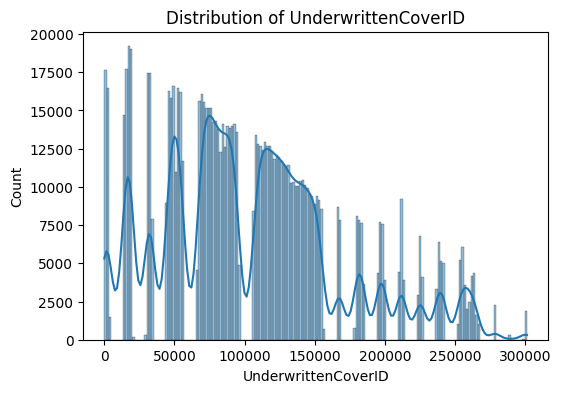

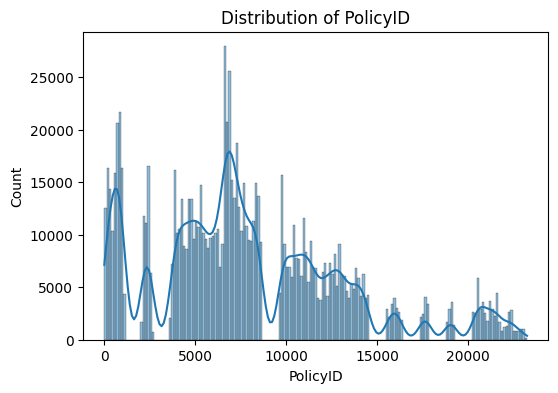

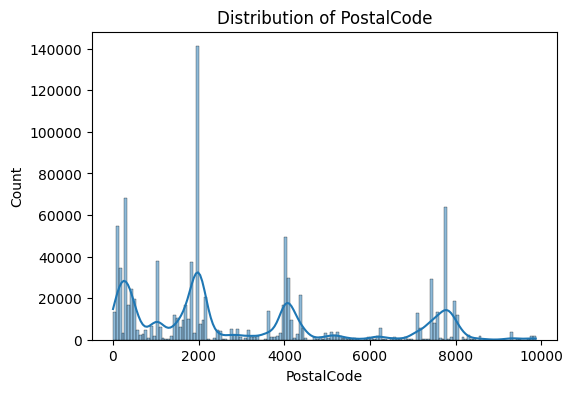

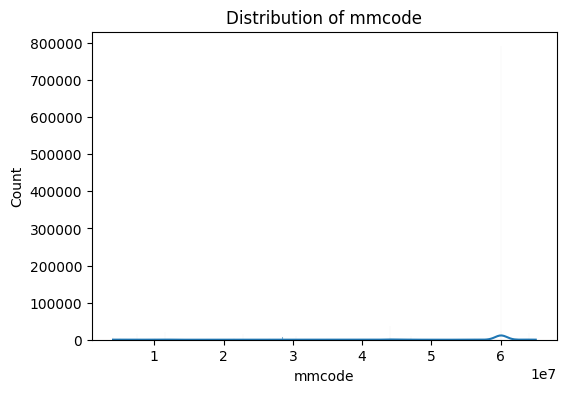

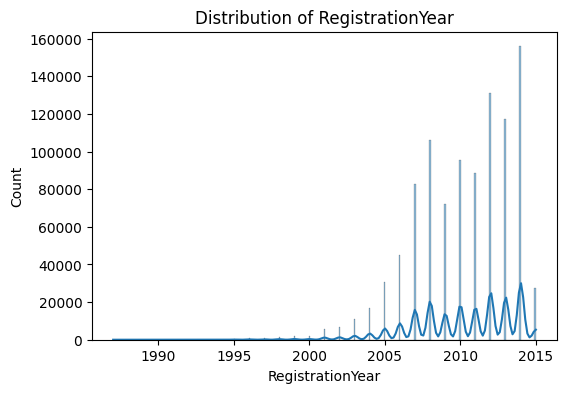

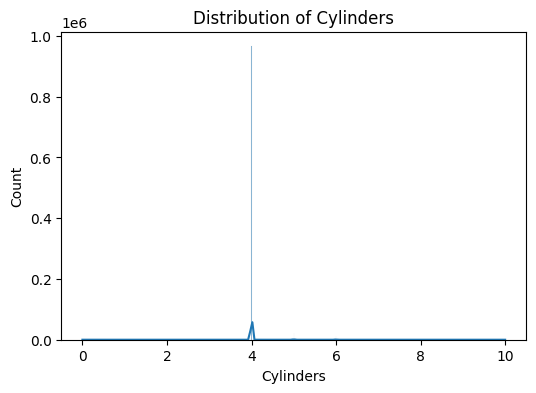

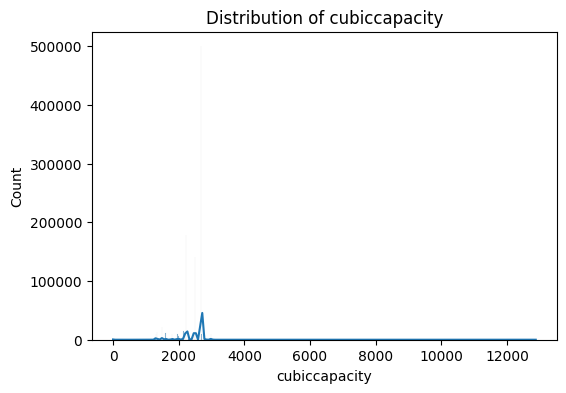

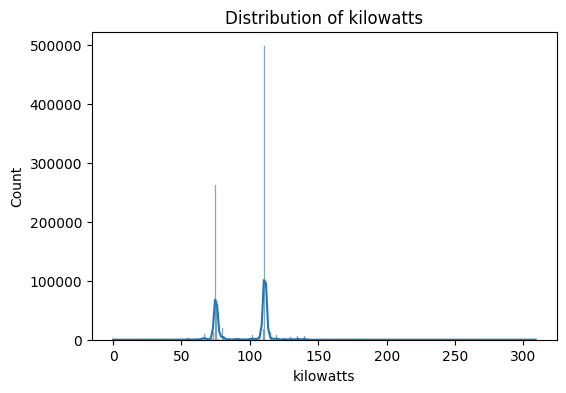

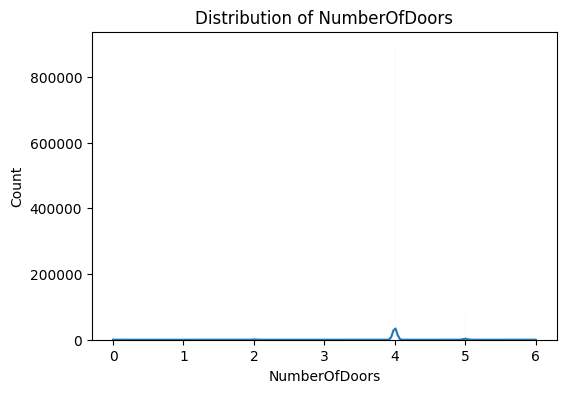

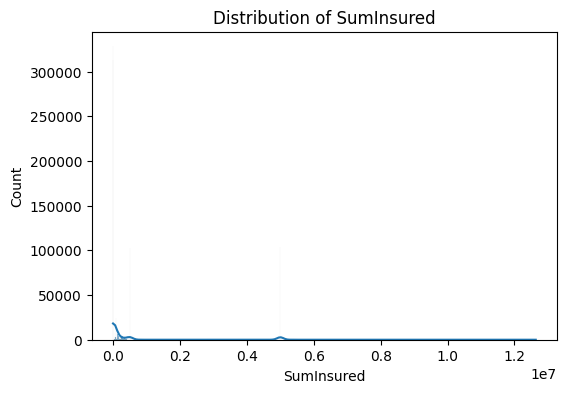

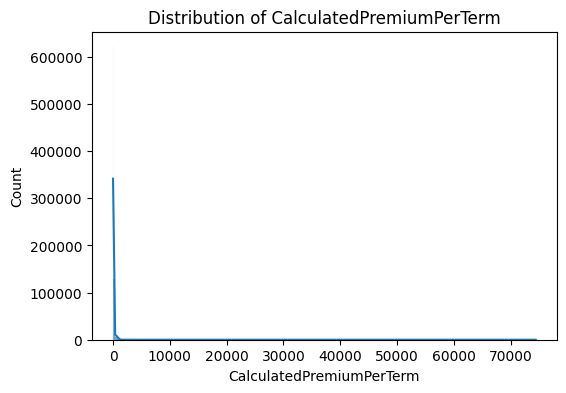

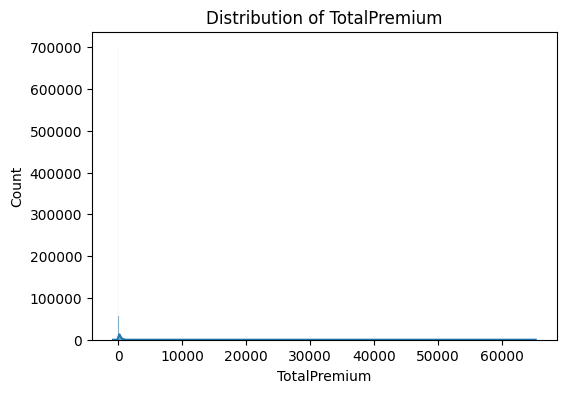

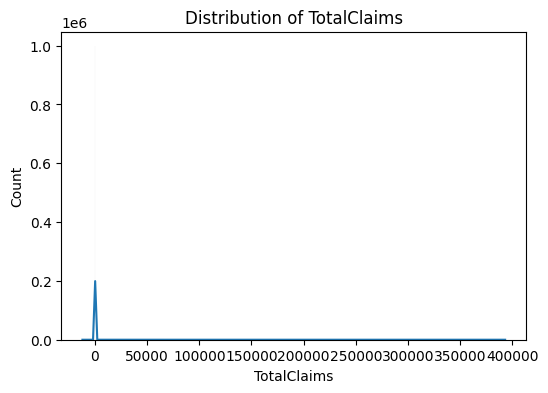

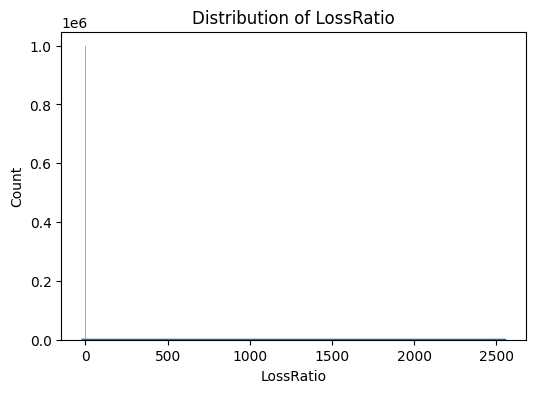

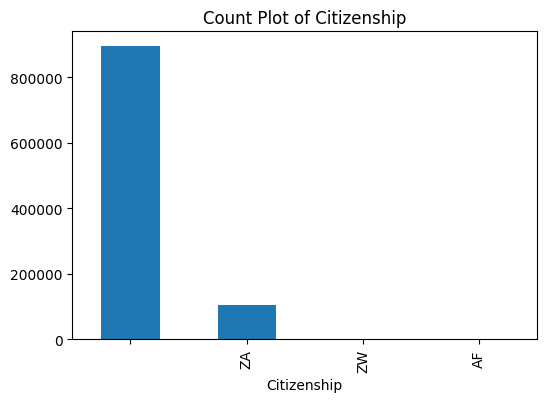

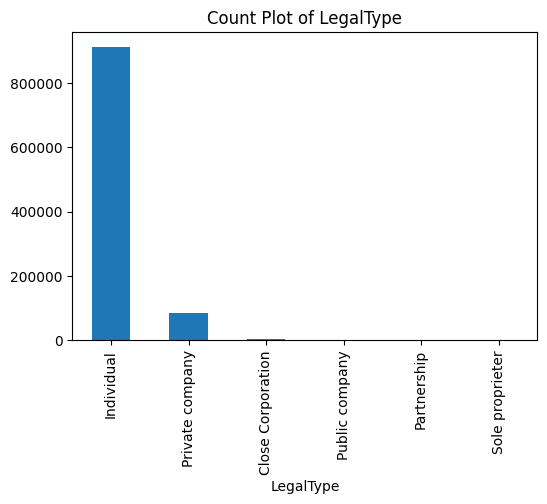

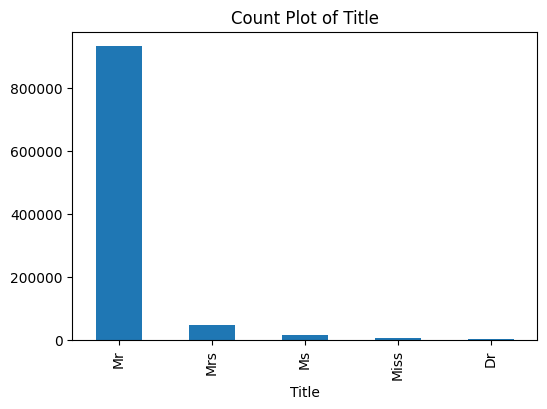

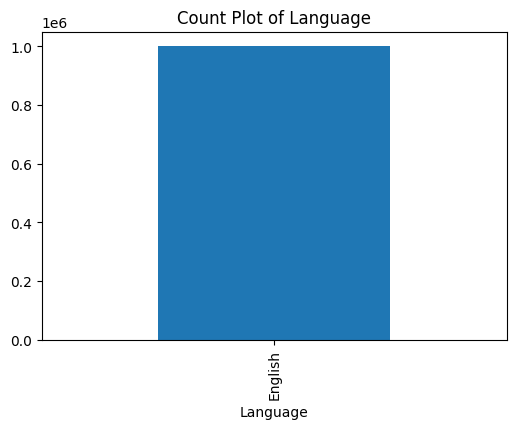

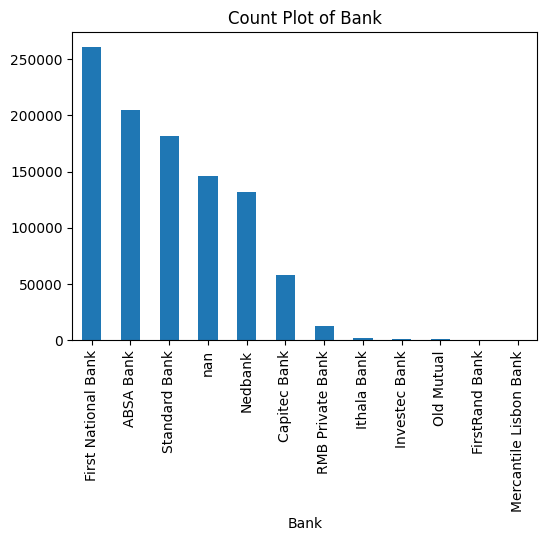

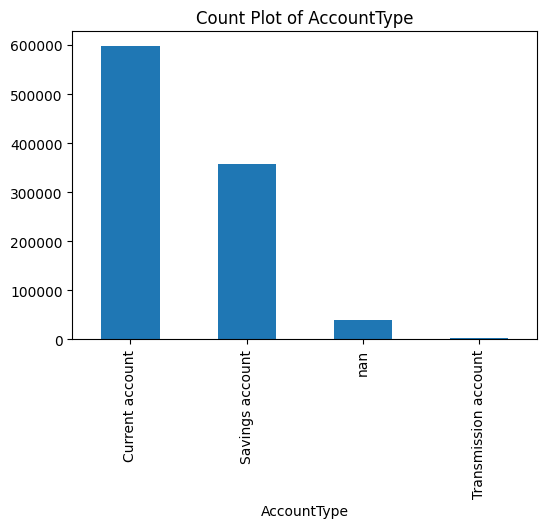

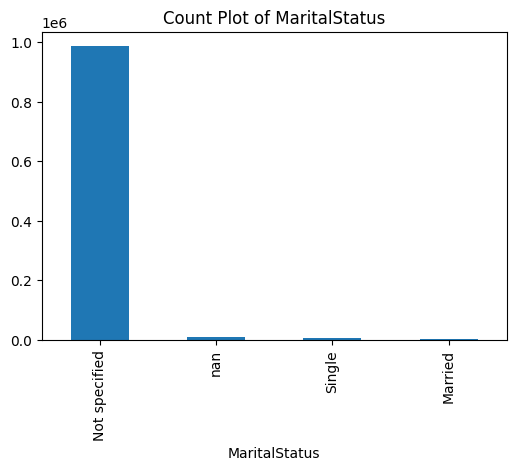

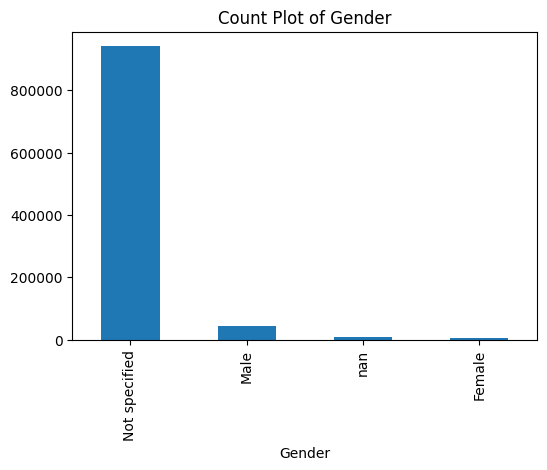

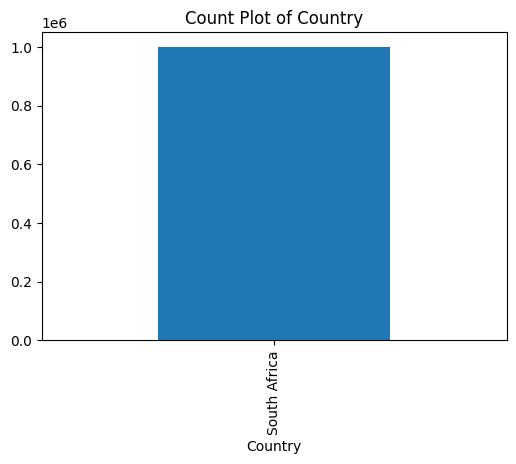

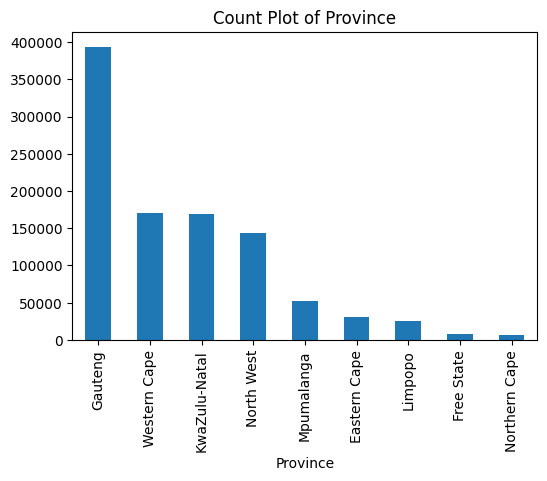

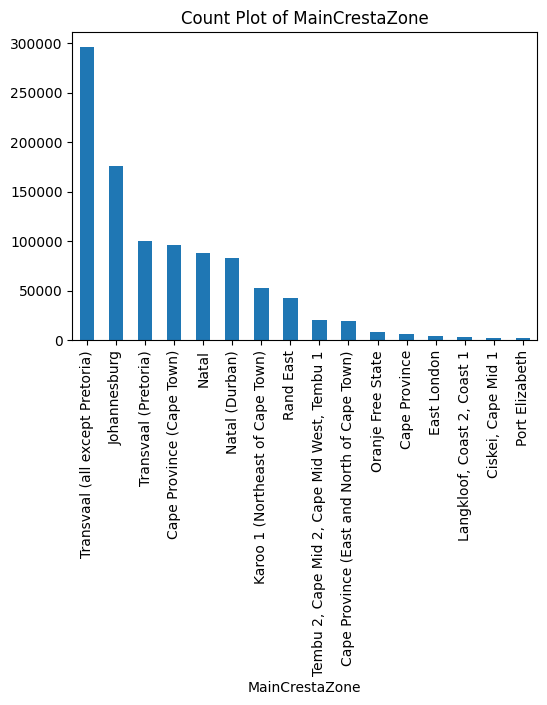

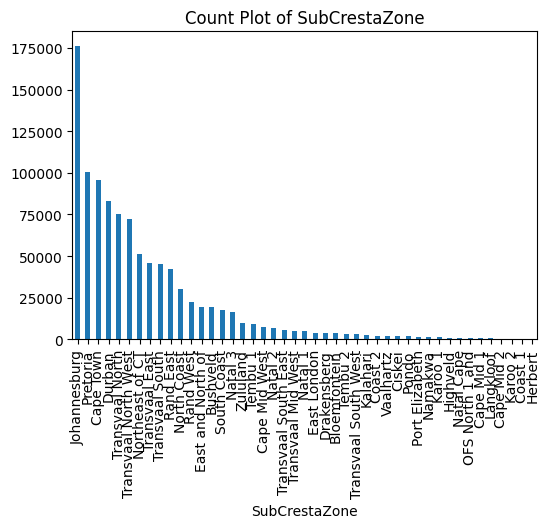

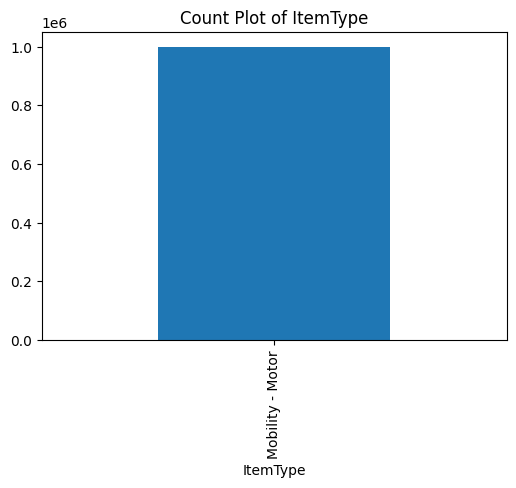

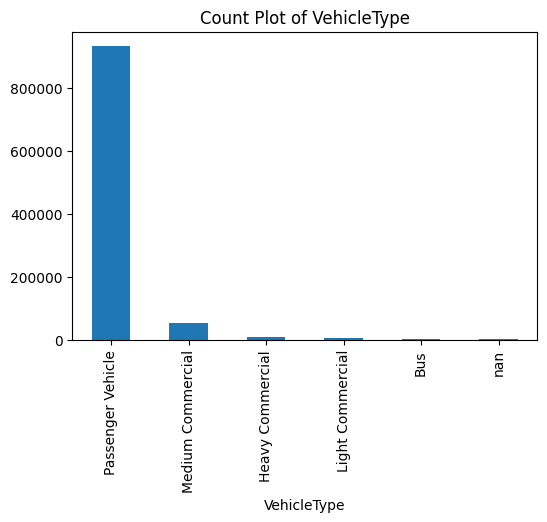

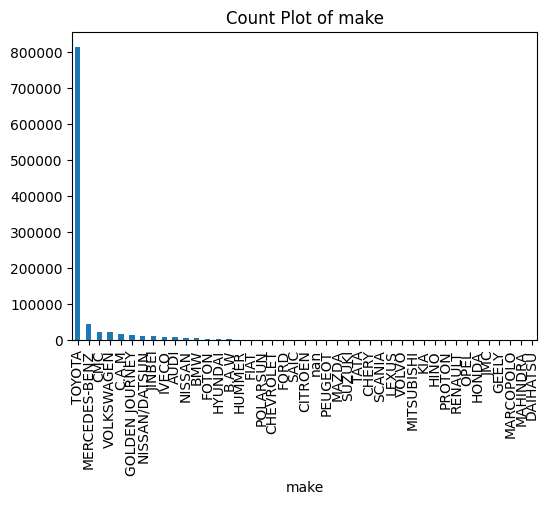

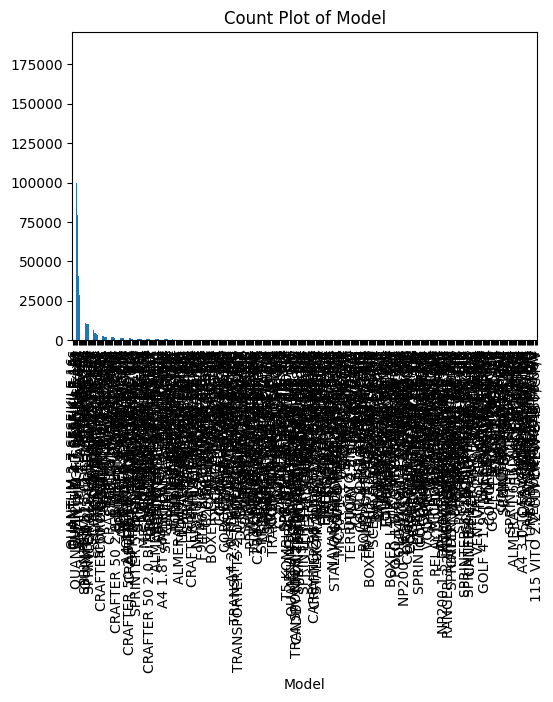

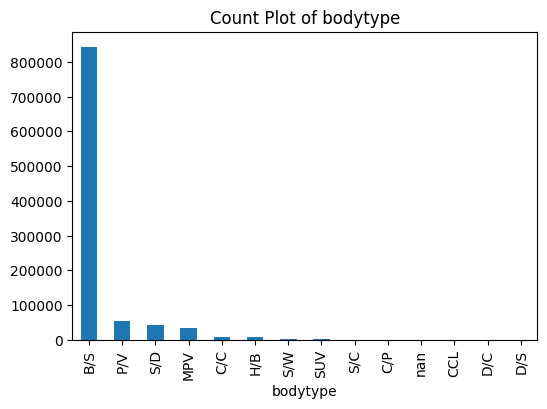

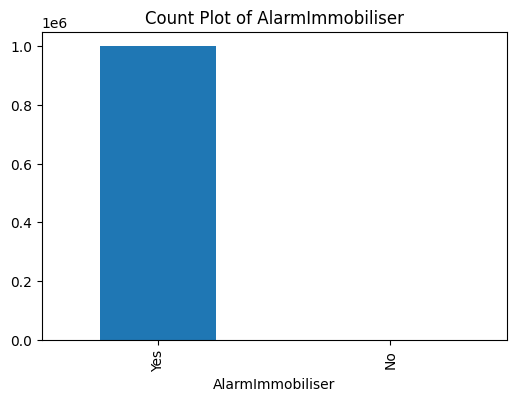

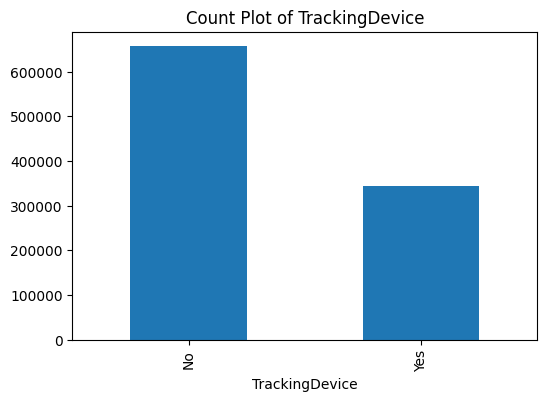

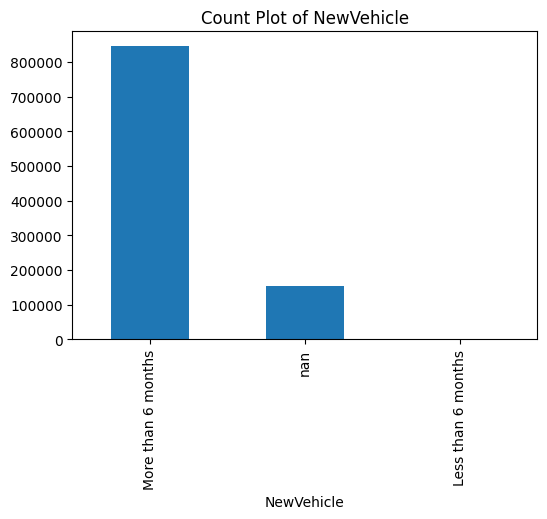

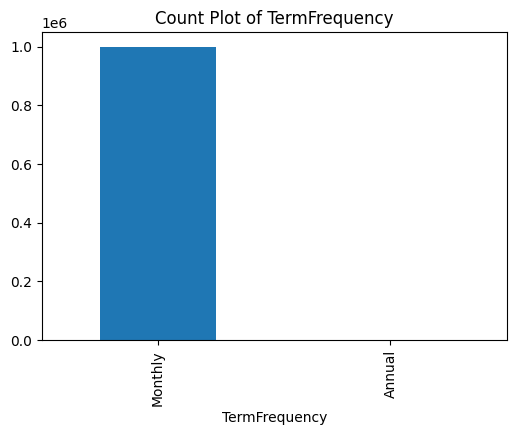

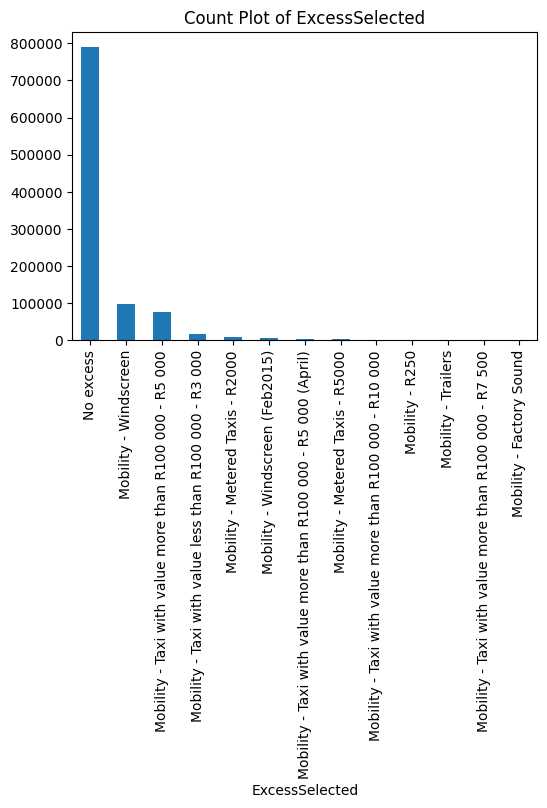

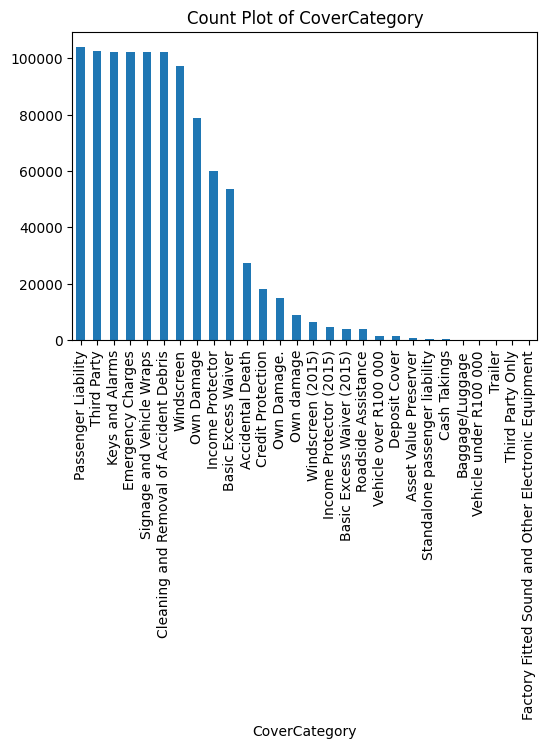

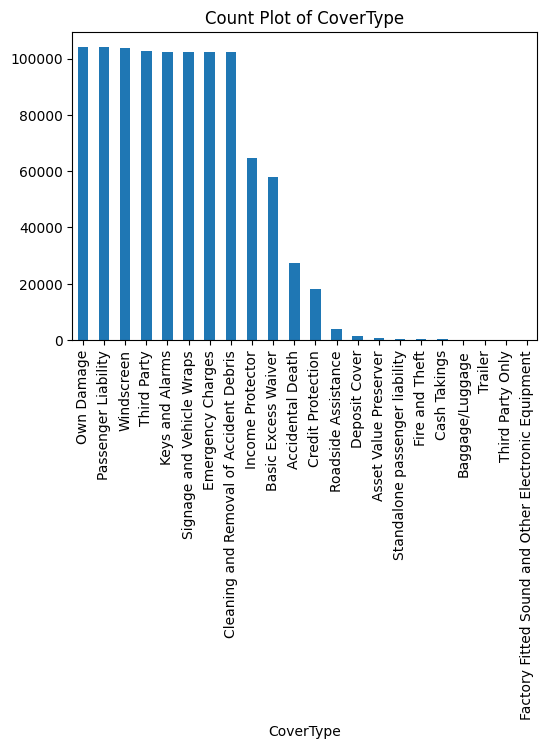

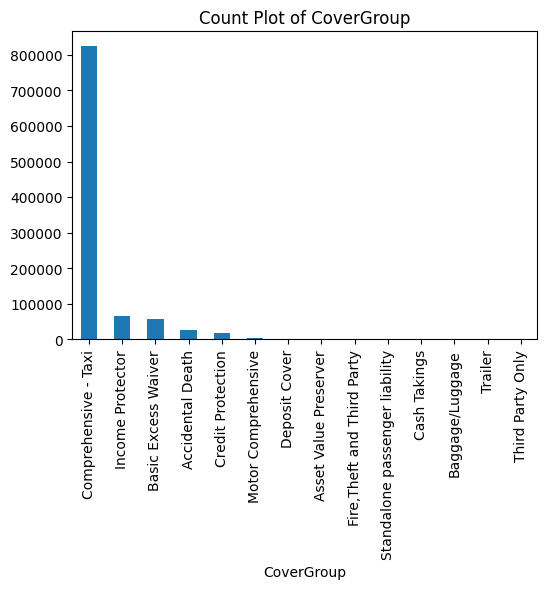

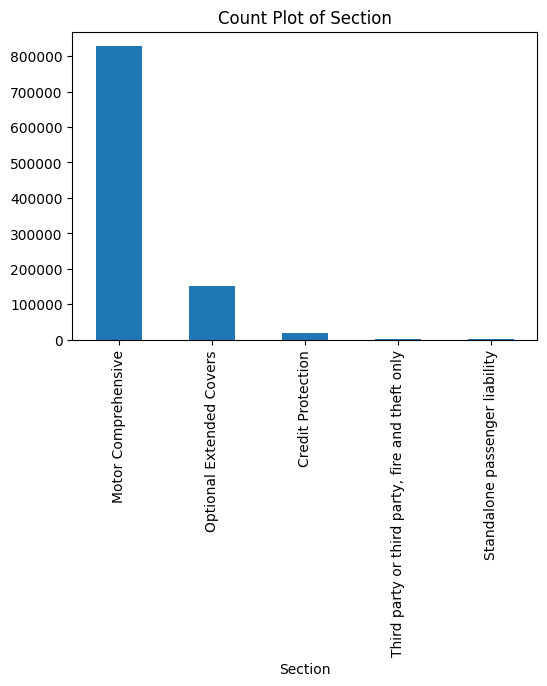

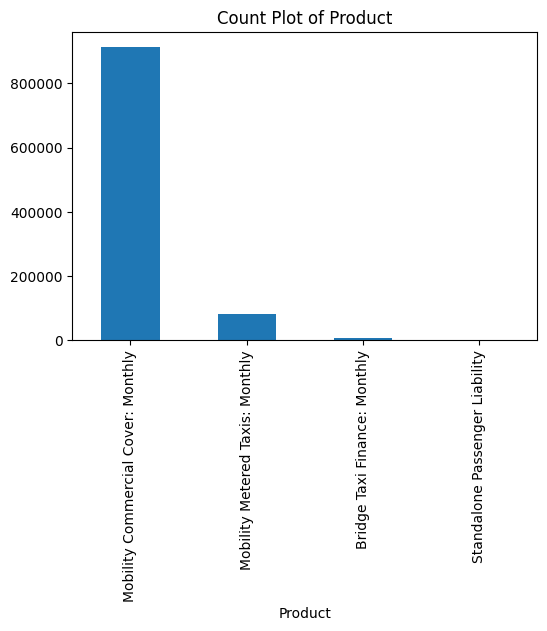

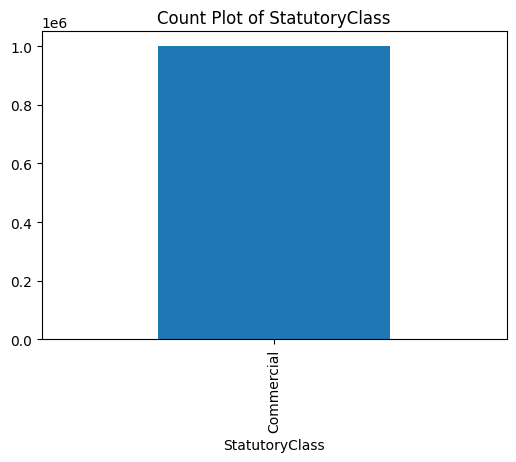

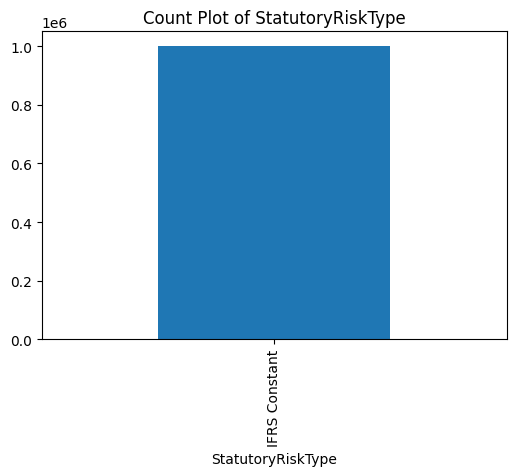

=== END OF UNIVARIATE ANALYSIS ===

=== BIVARIATE ANALYSIS ===



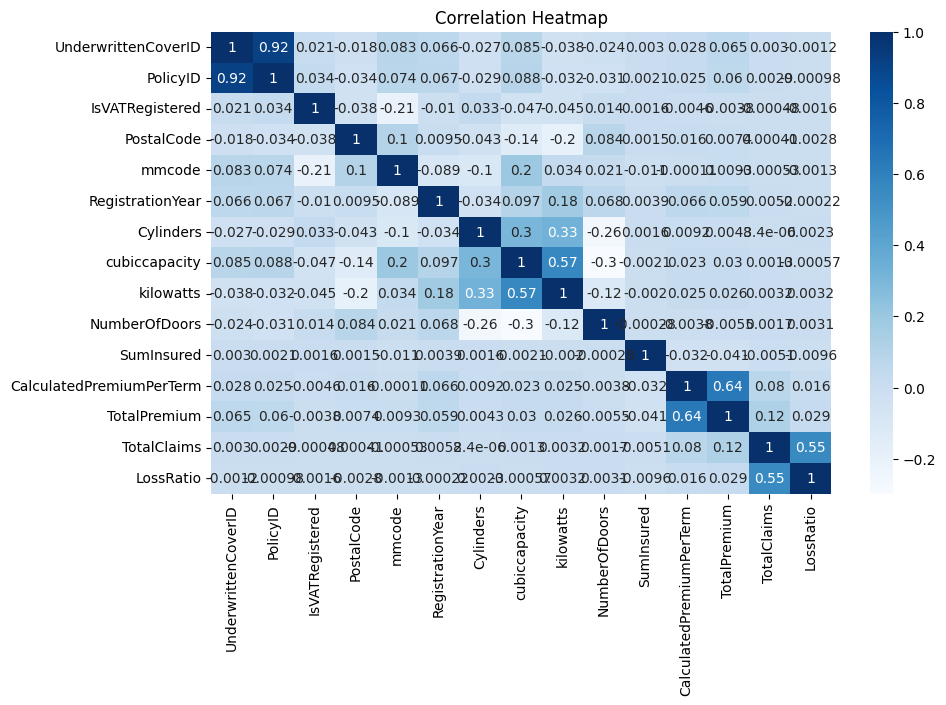

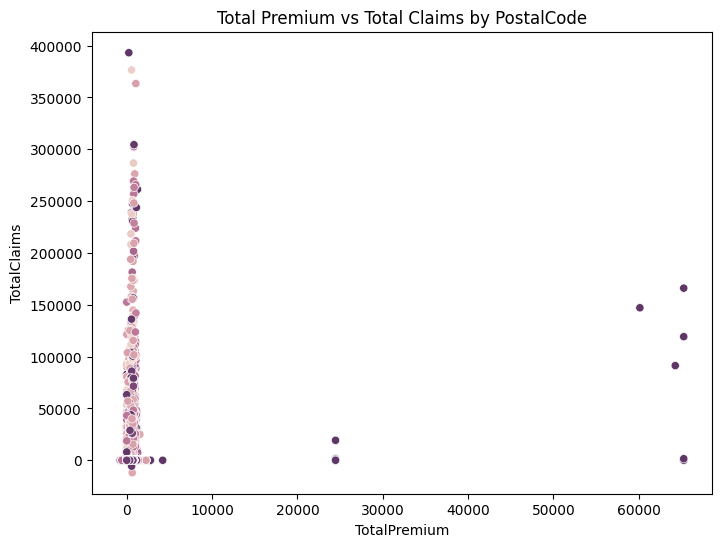

=== END OF BIVARIATE ANALYSIS ===

=== OUTLIER DETECTION ===



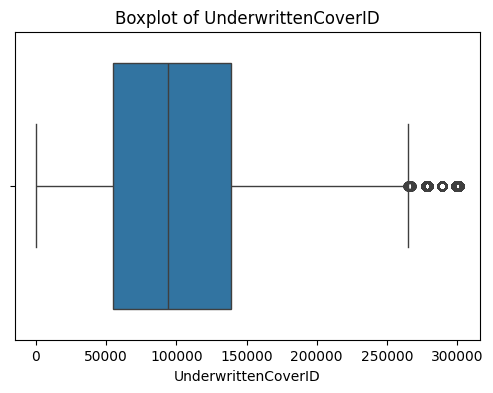

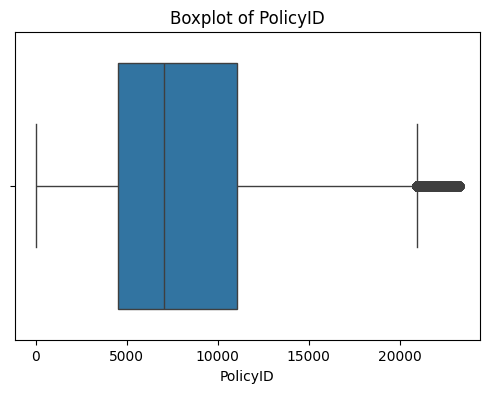

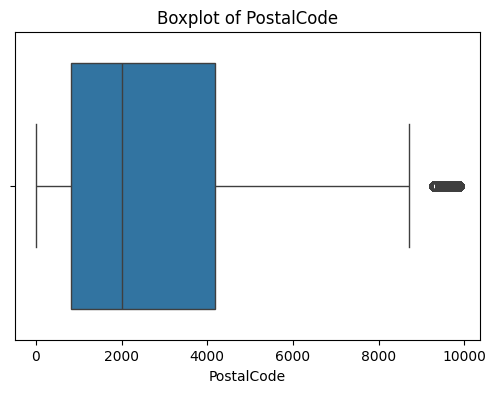

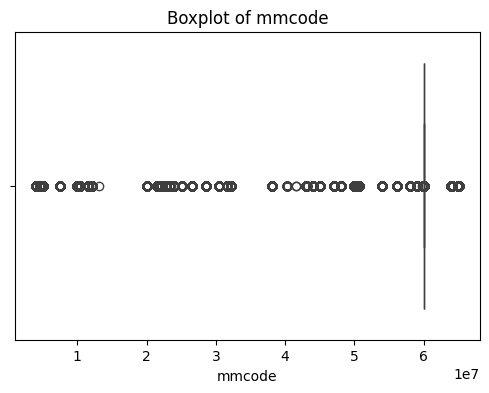

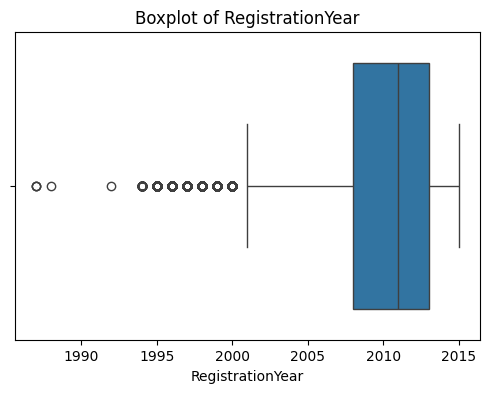

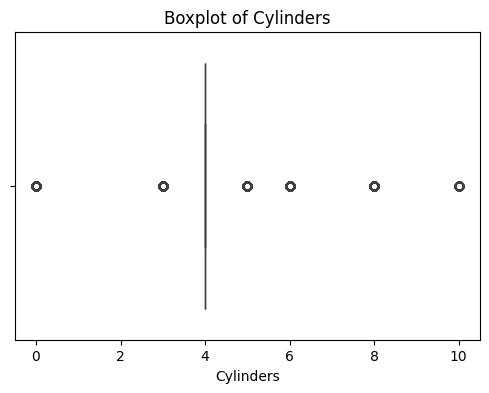

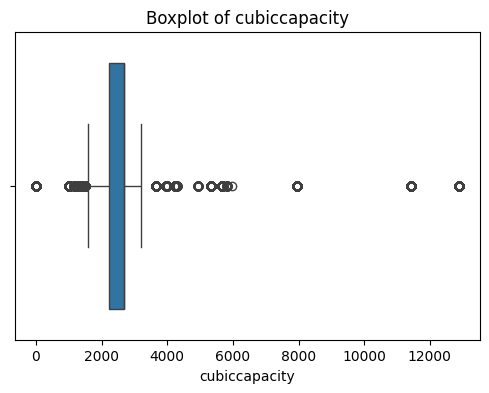

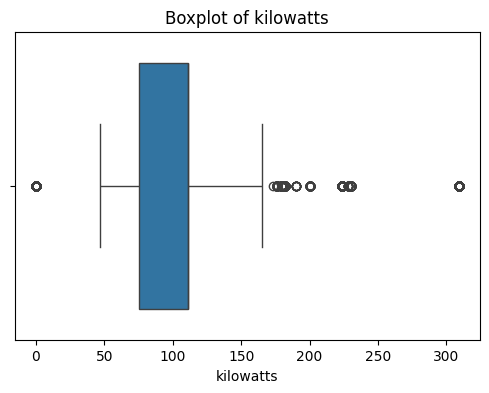

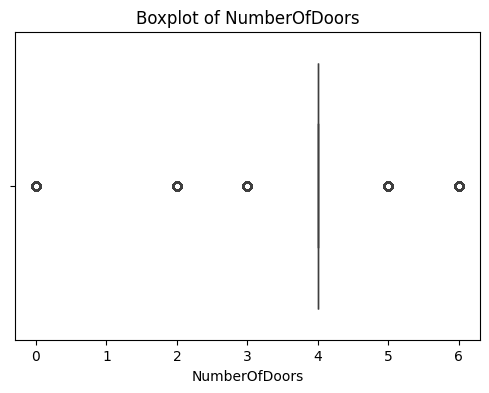

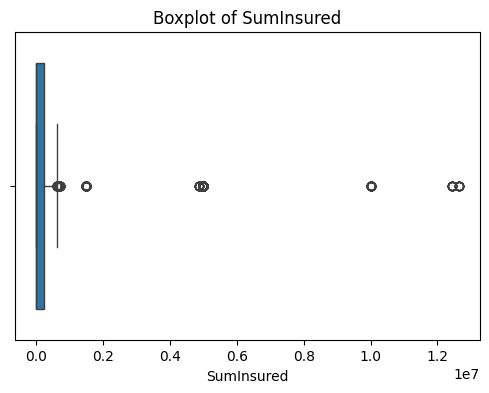

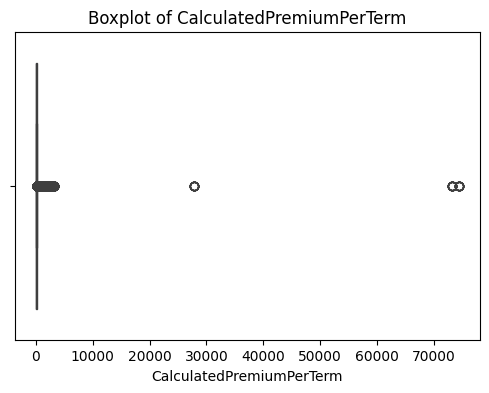

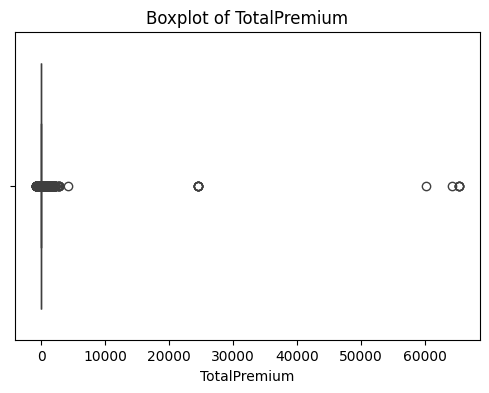

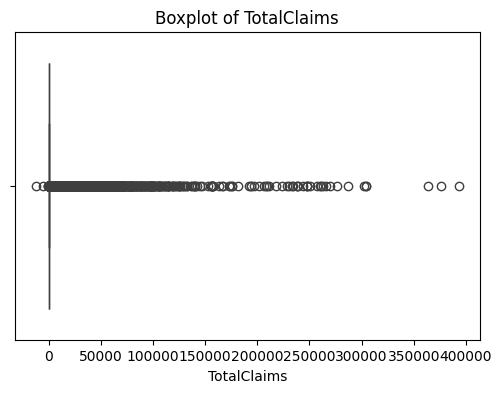

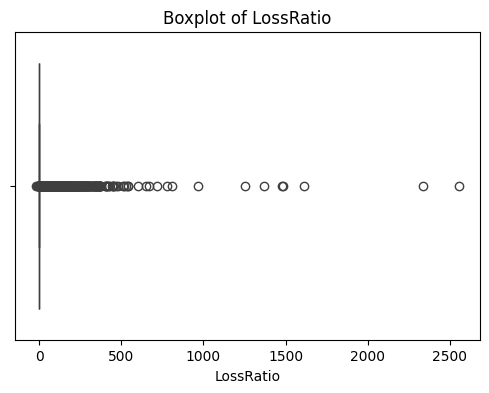

=== END OF OUTLIER DETECTION ===

=== CREATIVE INSIGHT PLOTS ===



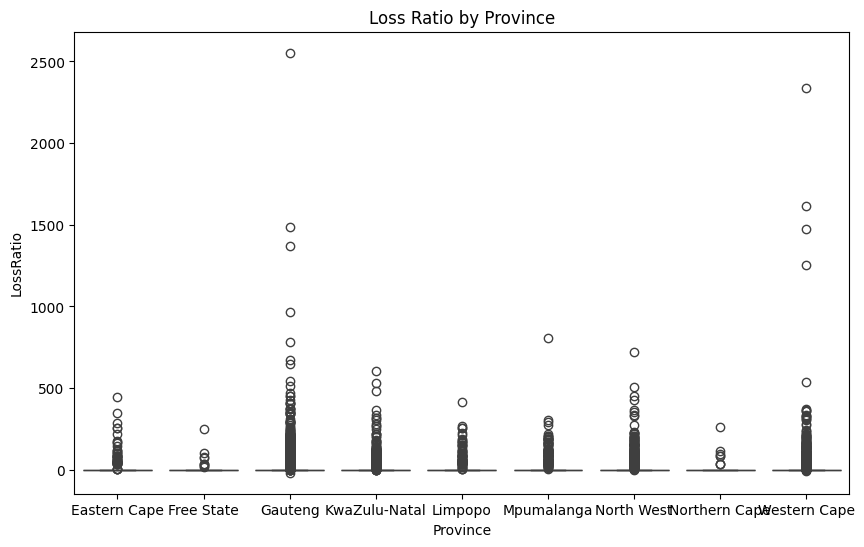

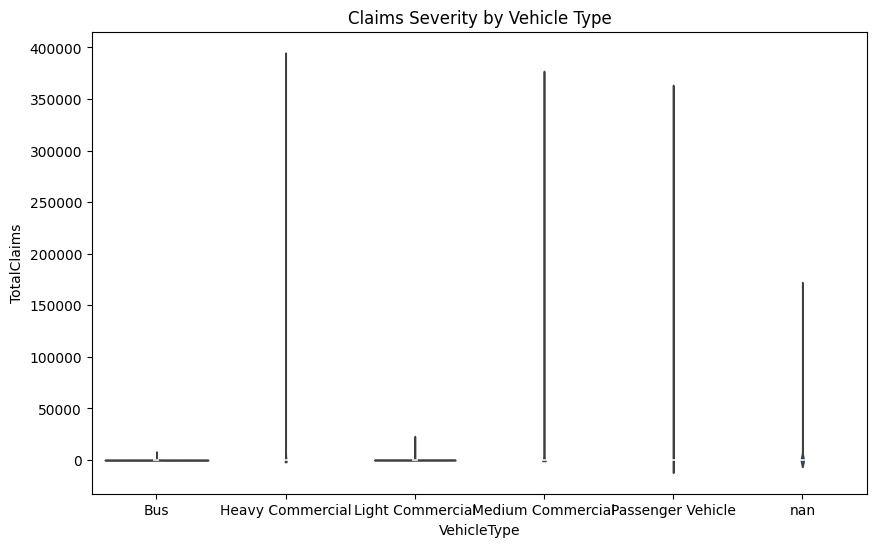

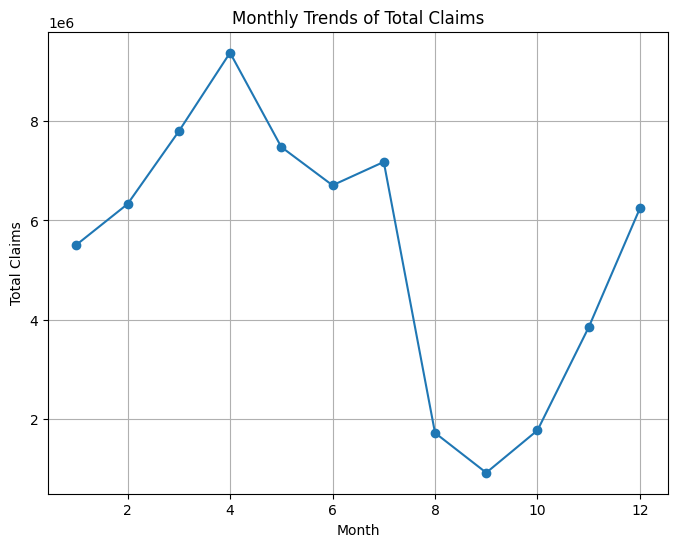

=== END OF CREATIVE INSIGHT PLOTS ===

=== ALL EDA COMPLETED ===



In [8]:
# perform EDA
from src.eda import InsuranceEDA
eda=InsuranceEDA(df_clean)
eda.run_all_eda()